In [1]:
# hw 08
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

#np.loadtxt(구분자 : 콤마)
data_a = np.loadtxt("data_a.txt",delimiter=",")
data_b = np.loadtxt("data_b.txt",delimiter=",")

In [2]:
data_a

array([[ 2.9595  ,  1.5581  , -0.61096 , -0.45629 ],
       [ 2.4452  , -0.44842 ,  2.5144  , -0.98481 ],
       [ 3.1157  ,  1.1519  ,  0.063745, -0.7221  ],
       ...,
       [ 3.3099  ,  0.69088 ,  1.2564  , -0.62332 ],
       [ 2.7875  , -0.092662,  2.9127  , -0.11129 ],
       [ 2.9716  , -1.3506  ,  6.8869  ,  1.3202  ]])

In [3]:
data_b

array([[ 3.2407 ,  4.3141 , -2.9888 ,  2.559  ],
       [ 3.048  ,  2.3415 ,  2.0843 ,  3.8624 ],
       [ 2.9453 ,  3.8718 , -3.323  ,  1.3432 ],
       ...,
       [ 2.6321 ,  3.0074 , -1.2821 ,  2.0958 ],
       [ 3.1803 ,  5.943  , -8.3657 ,  0.48498],
       [ 3.0279 ,  2.5626 ,  0.33556,  2.4754 ]])

In [4]:
# PCA구하기(data_a와 data_b를 합함)
# 1. 공분산(Covariance) matrix 구하기
dangdo = np.array([])
density = np.array([])
color = np.array([])
moisture = np.array([])
for i in range(len(data_a)):
    dangdo=np.append(dangdo,[data_a[i][0]])
    density=np.append(density,[data_a[i][1]])
    color=np.append(color,[data_a[i][2]])
    moisture=np.append(moisture,[data_a[i][3]])
for i in range(len(data_b)):
    dangdo=np.append(dangdo,[data_b[i][0]])
    density=np.append(density,[data_b[i][1]])
    color=np.append(color,[data_b[i][2]])
    moisture=np.append(moisture,[data_b[i][3]])    

A_B = np.array([dangdo,density,color,moisture])
#np.cov : 공분산 matrix를 출력해준다.
A_B_covariance = np.cov(A_B)
A_B_covariance

array([[ 4.65400643e-02,  1.97472057e-02, -7.80869036e-03,
        -5.79295269e-03],
       [ 1.97472057e-02,  5.32460593e+00, -9.54860209e+00,
         1.08606902e+00],
       [-7.80869036e-03, -9.54860209e+00,  1.87863401e+01,
        -3.11847281e-01],
       [-5.79295269e-03,  1.08606902e+00, -3.11847281e-01,
         1.86824703e+00]])

In [5]:
# 2. np.linalg.eig : 공분산 matrix에 대해 eigenvalue(w), eigenvactor(v)를 구한다.
w,v = np.linalg.eig(A_B_covariance)
print('eigenvalue : ',w)
print('eigenvactor : ',v)

eigenvalue :  [2.37655590e+01 5.16902603e-02 1.17555731e-03 2.20730832e+00]
eigenvactor :  [[-6.67158129e-04 -9.47542117e-01  3.19630235e-01 -5.78326498e-05]
 [-4.61168082e-01 -2.60731478e-01 -7.73836842e-01  3.47159384e-01]
 [ 8.86602137e-01 -1.31113718e-01 -3.86796042e-01  2.17105195e-01]
 [-3.54993785e-02  1.30354229e-01  3.86525389e-01  9.12329816e-01]]


### PC(Princal Component) : 분산이 가장 넓은 지역
### Covariance Matrix에 있는 Eigen Vector에 해당(n차원에서 n개 존재) Eigen Value가 높은 Eigen Vector를 찾아야 함

In [6]:
# w[0]과 w[3]이 해당함을 알아냄
w.sort()
w

array([1.17555731e-03, 5.16902603e-02, 2.20730832e+00, 2.37655590e+01])

In [7]:
# 3. 주성분 벡터 : v1과 v2는 v[0], v[3]에 해당
print("v1 : ",v[0])
print("v2 : ",v[3])

v1 :  [-6.67158129e-04 -9.47542117e-01  3.19630235e-01 -5.78326498e-05]
v2 :  [-0.03549938  0.13035423  0.38652539  0.91232982]


In [8]:
point_2d = np.array([A_B[:][0],A_B[:][3]])

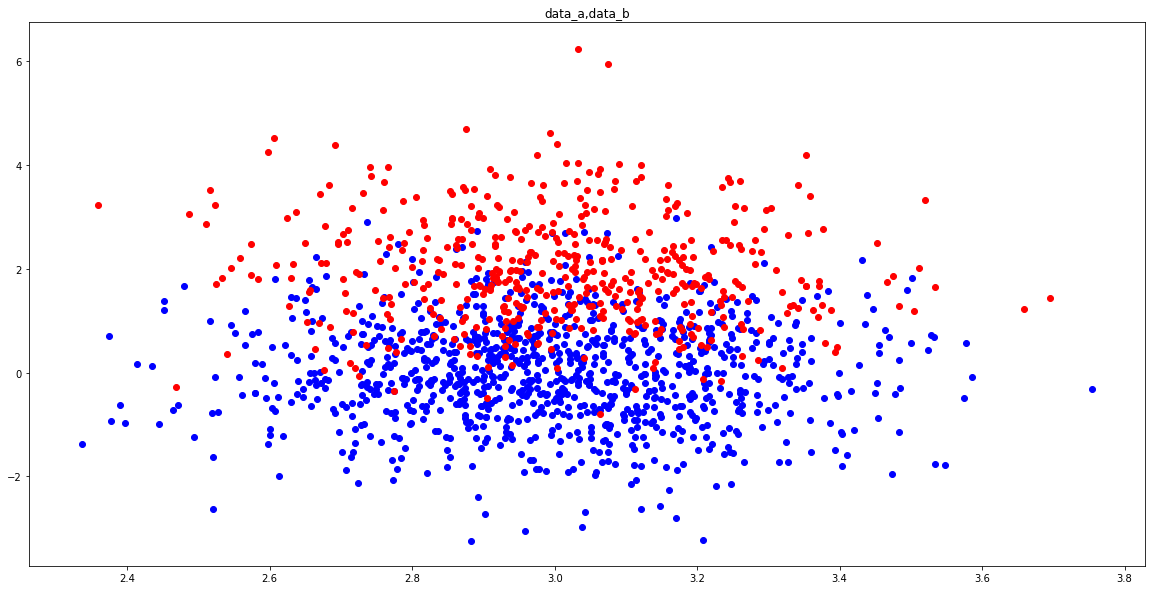

In [9]:
# plot (투영 전)
plt.figure(figsize=(20,10))
plt.title('data_a,data_b')
plt.scatter(point_2d[0][:1000],point_2d[1][:1000],color = 'blue',label = 'data_a')
plt.scatter(point_2d[0][1000:1500],point_2d[1][1000:1500],color = 'red',label='data_b')
plt.show()

In [10]:
# 부분공간 S 에 투영
point = np.matmul(v, A_B)
point_2d = np.array([point[:][0],point[:][3]])

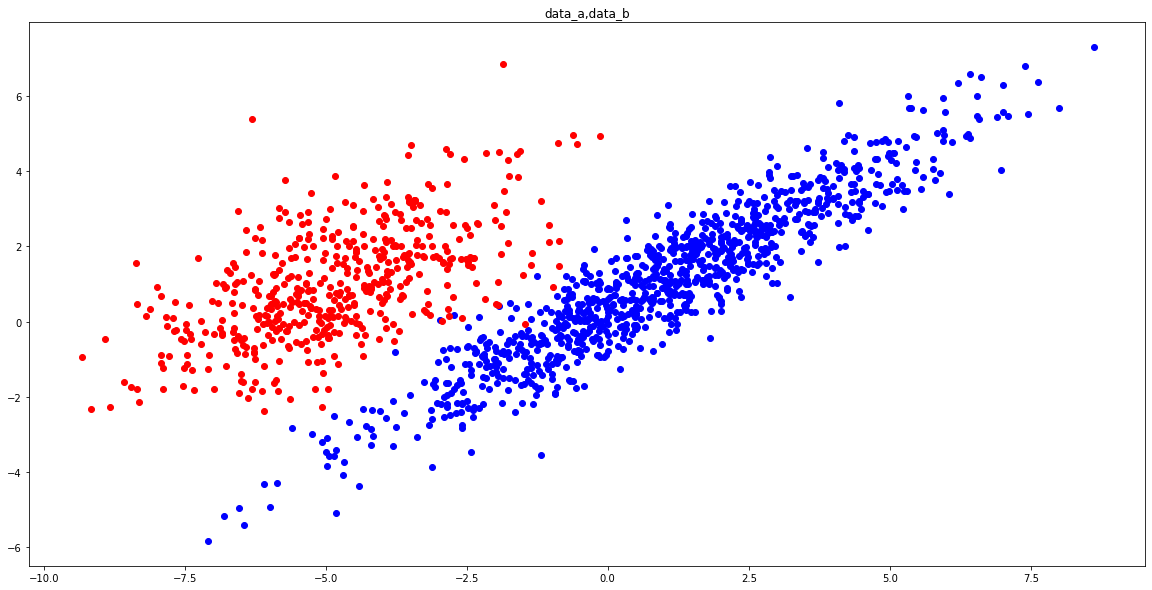

In [11]:
# plot (투영 후)
plt.figure(figsize=(20,10))
plt.title('data_a,data_b')
plt.scatter(point_2d[0][:1000],point_2d[1][:1000],color = 'blue',label = 'data_a')
plt.scatter(point_2d[0][1000:1500],point_2d[1][1000:1500],color = 'red',label='data_b')
plt.show()

# 가우시안 분포(정규분포)
   ## 다변수정규분포

In [12]:
# point_a, point_b의 covariance matrix, mean
point_a = np.array([point_2d[0][0:1000],point_2d[1][0:1000]])
point_b = np.array([point_2d[0][1000:1500],point_2d[1][1000:1500]])
a_means = np.array([np.mean(point_a[0]),np.mean(point_a[1])])
a_covariance = np.cov(point_a)
b_means = np.array([np.mean(point_b[0]),np.mean(point_b[1])])
b_covariance = np.cov(point_b)


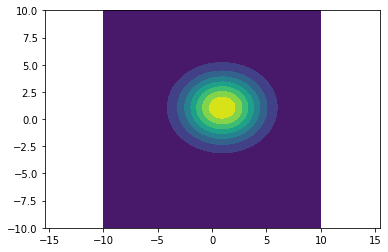

In [13]:
# point_a 의 2D 가우시안 분포
# Scipy의 stats 서브패키지에는 다변수 정규 분포를 위한 multivariate_normal 클래스가 있다. 
# mean 인수로 평균 벡터를, cov 인수로 공분산 행렬을 받는다.
rv = sp.multivariate_normal([a_means[0], a_means[1]], [[a_covariance[0][0], 0], [0,a_covariance[1][1]]])

# np.linspace -10에서 10까지 500등분 한다.
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
# np.meshgrid : 벡터를 행렬로 변환
X, Y = np.meshgrid(x,y)

plt.grid(False)
plt.contourf(X, Y, rv.pdf(np.dstack([X, Y])))
plt.axis("equal")
plt.show()

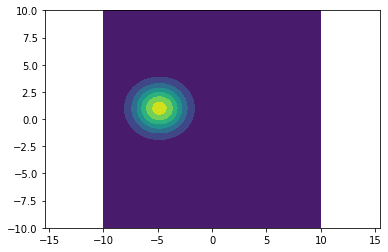

In [14]:
# point_b 의 2D 가우시안 분포
# Scipy의 stats 서브패키지에는 다변수 정규 분포를 위한 multivariate_normal 클래스가 있다. 
# mean 인수로 평균 벡터를, cov 인수로 공분산 행렬을 받는다.
rv = sp.multivariate_normal([b_means[0], b_means[1]], [[b_covariance[0][0], 0], [0,b_covariance[1][1]]])

# point_b 의 가우시안 분포
# np.linspace -10에서 10까지 500등분 한다.
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
# np.meshgrid : 벡터를 행렬로 변환
X, Y = np.meshgrid(x,y)

plt.grid(False)
plt.contourf(X, Y, rv.pdf(np.dstack([X, Y])))
plt.axis("equal")
plt.show()

# 올해 수확한 사과 2개체

In [15]:
# test 데이터 부분공간 S에 투영
data_t = np.loadtxt("test.txt",delimiter=",") 
# PCA구하기

# 1. 공분산(Covariance) matrix 구하기
dangdo = np.array([])
density = np.array([])
color = np.array([])
moisture = np.array([])
for i in range(len(data_t)):
    dangdo=np.append(dangdo,[data_t[i][0]])
    density=np.append(density,[data_t[i][1]])
    color=np.append(color,[data_t[i][2]])
    moisture=np.append(moisture,[data_t[i][3]])

T = np.array([dangdo,density,color,moisture])
#np.cov : 공분산 matrix를 출력해준다.
T_covariance = np.cov(T)
T_covariance


array([[ 11.25039612, -33.72415043,   6.72296255,   3.58205403],
       [-33.72415043, 101.09140241, -20.15273043, -10.73755337],
       [  6.72296255, -20.15273043,   4.01747858,   2.14054819],
       [  3.58205403, -10.73755337,   2.14054819,   1.14050304]])

In [16]:
# 2. np.linalg.eig : 공분산 matrix에 대해 eigenvalue(w), eigenvactor(v)를 구한다.
w,v = np.linalg.eig(T_covariance)
print('eigenvalue : ',w)
print('eigenvactor : ',v)

eigenvalue :  [ 0.00000000e+00  1.17499780e+02 -2.11764262e-16  4.42006156e-16]
eigenvactor :  [[-0.95092154 -0.30943211 -0.62296468  0.40823652]
 [-0.30182783  0.92755268 -0.28058193  0.32338968]
 [ 0.06016985 -0.18490909 -0.59242692  0.63513414]
 [ 0.03205903 -0.0985212   0.42687134  0.57040923]]


In [17]:
# w[1]과 w[3]이 해당함을 알아냄
w.sort()
w

array([-2.11764262e-16,  0.00000000e+00,  4.42006156e-16,  1.17499780e+02])

In [18]:
# 3. 주성분 벡터 : v1과 v2는 v[1], v[3]에 해당
print("v1 : ",v[1])
print("v2 : ",v[3])

v1 :  [-0.30182783  0.92755268 -0.28058193  0.32338968]
v2 :  [ 0.03205903 -0.0985212   0.42687134  0.57040923]


In [19]:
# 부분공간 S 에 투영
point_t = np.matmul(v,T)
point_2d_t = np.array([point_t[:][1],point_t[:][3]])
point_2d_t

array([[-3.77373648, 11.15387022],
       [ 0.93009833, -2.69435504]])

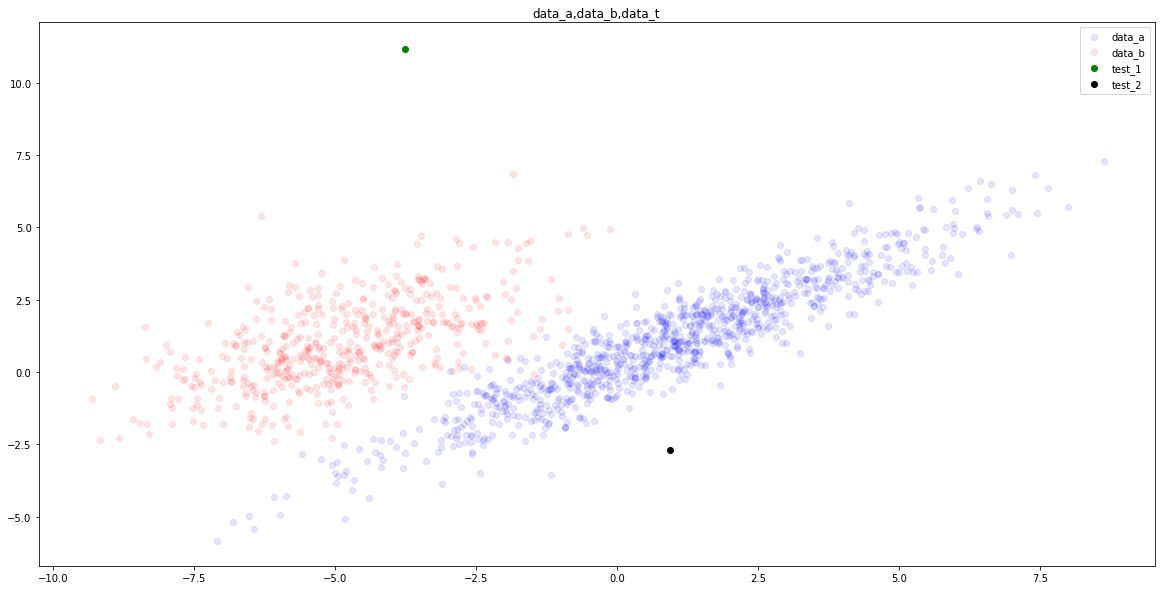

In [20]:
# plot(투영 후, data_a, data_b, data_t)
plt.figure(figsize=(20,10))
plt.title('data_a,data_b,data_t')
plt.scatter(point_2d[0][:1000],point_2d[1][:1000],color = 'blue',alpha=.1,label = 'data_a')
plt.scatter(point_2d[0][1000:1500],point_2d[1][1000:1500],color = 'red',alpha=.1,label='data_b')
plt.scatter(point_2d_t[0][0],point_2d_t[0][1],color='green',label='test_1')
plt.scatter(point_2d_t[1][0],point_2d_t[1][1],color='black',label='test_2')
plt.legend()
plt.show()

In [21]:
# point_t의 covariance matrix, mean
point_t = np.array([point_2d_t[0][0:2],point_2d_t[1][0:2]])
t_means = np.array([np.mean(point_t[0]),np.mean(point_t[1])])
t_covariance = np.cov(point_t)

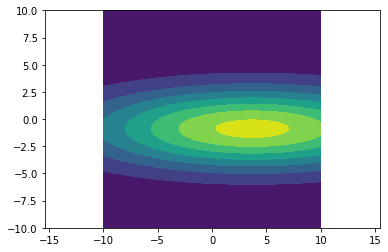

In [22]:
# point_t 의 2D 가우시안 분포
# Scipy의 stats 서브패키지에는 다변수 정규 분포를 위한 multivariate_normal 클래스가 있다. 
# mean 인수로 평균 벡터를, cov 인수로 공분산 행렬을 받는다.
rv = sp.multivariate_normal([t_means[0], t_means[1]], [[t_covariance[0][0], 0], [0,t_covariance[1][1]]])

# np.linspace -10에서 10까지 500등분 한다.
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
# np.meshgrid : 벡터를 행렬로 변환
X, Y = np.meshgrid(x,y)

plt.grid(False)
plt.contourf(X, Y, rv.pdf(np.dstack([X, Y])))
plt.axis("equal")
plt.show()

# Mahalanobis distance

In [23]:
a_means

array([0.93535952, 1.04637357])

In [24]:
a_covariance

array([[6.20230308, 4.76126539],
       [4.76126539, 4.18583932]])

In [25]:
# Mahalanovis Distance 구하기
# a 품종과 test 데이터와의 거리
# (test값 - A의 평균값)
data_At_1 = np.array([[point_t[0][0],point_t[0][1]]]) - a_means
# (test값 - A의 평균값)
data_At_2 = np.array([[point_t[1][0],point_t[1][1]]]) - a_means 
# C : covariance matrix(a)
C = np.array([[a_covariance[0][0],a_covariance[0][1]],[a_covariance[1][0],a_covariance[1][1]]])

C_inv = np.linalg.inv(C)
# Transpose
T_data_At_1 = data_At_1.transpose()
T_data_At_2 = data_At_2.transpose()

MD_At1_First = np.matmul(data_At_1,C_inv)
MD_At1_Result = np.matmul(MD_At1_First,T_data_At_1)

MD_At2_First = np.matmul(data_At_2,C_inv)
MD_At2_Result = np.matmul(MD_At2_First,T_data_At_2)

print('MD_t1 : ',abs(MD_At1_Result))
print('MD_t2 : ',abs(MD_At2_Result))

MD_t1 :  [[358.3339197]]
MD_t2 :  [[26.30519178]]


In [26]:
b_means

array([-4.84380487,  0.99464216])

In [27]:
b_covariance

array([[2.77424815, 1.48355024],
       [1.48355024, 2.21884592]])

In [28]:
# Mahalanovis Distance 구하기
# B 품종과 test 데이터와의 거리
# (test값 - B의 평균값)
data_Bt_1 = np.array([[point_t[0][0],point_t[0][1]]]) - b_means
# (test값 - B의 평균값)
data_Bt_2 = np.array([[point_t[1][0],point_t[1][1]]]) - b_means 
# C: 
C = np.array([[b_covariance[0][0],b_covariance[0][1]],[b_covariance[1][0],b_covariance[1][1]]])

C_inv = np.linalg.inv(C)
# Transpose
T_data_Bt_1 = data_Bt_1.transpose()
T_data_Bt_2 = data_Bt_2.transpose()

MD_Bt1_First = np.matmul(data_Bt_1,C_inv)
MD_Bt1_Result = np.matmul(MD_Bt1_First,T_data_Bt_1)

MD_Bt2_First = np.matmul(data_Bt_2,C_inv)
MD_Bt2_Result = np.matmul(MD_Bt2_First,T_data_Bt_2)

print('MD_t1 : ',abs(MD_Bt1_Result))
print('MD_t2 : ',abs(MD_Bt2_Result))

MD_t1 :  [[64.88849536]]
MD_t2 :  [[44.23201186]]
